<a href="https://colab.research.google.com/github/Soumi-Das02/FSP/blob/main/CarPrice_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop and evaluate a regression model to predict the price of cars using various attributes from the CarPrice_Assignment.csv dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/FSP classes/data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.columns.get_loc("enginesize")

16

In [6]:
df.columns.get_loc("horsepower")

21

In [7]:
df.columns.get_loc("carbody")

6

In [8]:
df.columns.get_loc("fueltype")

3

In [10]:
df.columns.get_loc("price")

25

In [9]:
x=df.iloc[:,[3,6,16,21]].values
x

array([['gas', 'convertible', 130, 111],
       ['gas', 'convertible', 130, 111],
       ['gas', 'hatchback', 152, 154],
       ['gas', 'sedan', 109, 102],
       ['gas', 'sedan', 136, 115],
       ['gas', 'sedan', 136, 110],
       ['gas', 'sedan', 136, 110],
       ['gas', 'wagon', 136, 110],
       ['gas', 'sedan', 131, 140],
       ['gas', 'hatchback', 131, 160],
       ['gas', 'sedan', 108, 101],
       ['gas', 'sedan', 108, 101],
       ['gas', 'sedan', 164, 121],
       ['gas', 'sedan', 164, 121],
       ['gas', 'sedan', 164, 121],
       ['gas', 'sedan', 209, 182],
       ['gas', 'sedan', 209, 182],
       ['gas', 'sedan', 209, 182],
       ['gas', 'hatchback', 61, 48],
       ['gas', 'hatchback', 90, 70],
       ['gas', 'sedan', 90, 70],
       ['gas', 'hatchback', 90, 68],
       ['gas', 'hatchback', 90, 68],
       ['gas', 'hatchback', 98, 102],
       ['gas', 'hatchback', 90, 68],
       ['gas', 'sedan', 90, 68],
       ['gas', 'sedan', 90, 68],
       ['gas', 'sedan', 98, 

In [12]:
y=df.iloc[:,25].values
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [16]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
x[:,0]=en.fit_transform(x[:,0])
x[:,1]=en.fit_transform(x[:,1])
x

array([[1, 0, 130, 111],
       [1, 0, 130, 111],
       [1, 2, 152, 154],
       [1, 3, 109, 102],
       [1, 3, 136, 115],
       [1, 3, 136, 110],
       [1, 3, 136, 110],
       [1, 4, 136, 110],
       [1, 3, 131, 140],
       [1, 2, 131, 160],
       [1, 3, 108, 101],
       [1, 3, 108, 101],
       [1, 3, 164, 121],
       [1, 3, 164, 121],
       [1, 3, 164, 121],
       [1, 3, 209, 182],
       [1, 3, 209, 182],
       [1, 3, 209, 182],
       [1, 2, 61, 48],
       [1, 2, 90, 70],
       [1, 3, 90, 70],
       [1, 2, 90, 68],
       [1, 2, 90, 68],
       [1, 2, 98, 102],
       [1, 2, 90, 68],
       [1, 3, 90, 68],
       [1, 3, 90, 68],
       [1, 3, 98, 102],
       [1, 4, 122, 88],
       [1, 2, 156, 145],
       [1, 2, 92, 58],
       [1, 2, 92, 76],
       [1, 2, 79, 60],
       [1, 2, 92, 76],
       [1, 2, 92, 76],
       [1, 3, 92, 76],
       [1, 4, 92, 76],
       [1, 2, 110, 86],
       [1, 2, 110, 86],
       [1, 3, 110, 86],
       [1, 3, 110, 86],
       [1, 3

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.32879797, -3.05097525,  0.07444893,  0.17448278],
       [ 0.32879797, -3.05097525,  0.07444893,  0.17448278],
       [ 0.32879797, -0.71720687,  0.60404617,  1.26453643],
       [ 0.32879797,  0.44967732, -0.43107572, -0.05366798],
       [ 0.32879797,  0.44967732,  0.21888454,  0.27588312],
       [ 0.32879797,  0.44967732,  0.21888454,  0.14913269],
       [ 0.32879797,  0.44967732,  0.21888454,  0.14913269],
       [ 0.32879797,  1.61656151,  0.21888454,  0.14913269],
       [ 0.32879797,  0.44967732,  0.09852153,  0.90963524],
       [ 0.32879797, -0.71720687,  0.09852153,  1.41663694],
       [ 0.32879797,  0.44967732, -0.45514832, -0.07901807],
       [ 0.32879797,  0.44967732, -0.45514832, -0.07901807],
       [ 0.32879797,  0.44967732,  0.89291739,  0.42798363],
       [ 0.32879797,  0.44967732,  0.89291739,  0.42798363],
       [ 0.32879797,  0.44967732,  0.89291739,  0.42798363],
       [ 0.32879797,  0.44967732,  1.97618448,  1.9743388 ],
       [ 0.32879797,  0.

In [19]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=1)
x_train

array([[ 0.32879797, -0.71720687,  0.70033658,  1.03638566],
       [ 0.32879797,  1.61656151,  0.82069959,  1.3152366 ],
       [ 0.32879797,  1.61656151, -0.84030995, -1.06767138],
       [ 0.32879797,  0.44967732, -0.86438255, -0.91557087],
       [ 0.32879797,  0.44967732, -0.71994694, -0.89022078],
       [ 0.32879797,  0.44967732, -0.45514832, -0.25646866],
       [ 0.32879797, -0.71720687,  1.30215163,  2.43064033],
       [ 0.32879797, -0.71720687, -0.14220449,  0.14913269],
       [ 0.32879797,  0.44967732, -0.40700311, -0.10436815],
       [ 0.32879797,  0.44967732,  1.97618448,  1.9743388 ],
       [ 0.32879797,  0.44967732,  0.21888454,  0.14913269],
       [ 0.32879797, -0.71720687, -0.84030995, -1.06767138],
       [ 0.32879797,  1.61656151,  0.07444893,  1.46733711],
       [ 0.32879797,  0.44967732,  3.15574198,  1.82223829],
       [ 0.32879797,  0.44967732, -0.69587434,  0.19983286],
       [-3.04138127,  0.44967732,  0.17073933, -0.81417053],
       [-3.04138127,  1.

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [24]:
y_pred=knn_regressor.predict(x_test)
y_pred

array([ 5828.    ,  7647.6   ,  5720.    ,  7296.9   ,  8120.8   ,
       22483.6   ,  6465.8   ,  5674.    ,  5720.    ,  9207.6   ,
       14863.    , 11935.6   , 14632.8   ,  9856.4   , 15756.    ,
       11926.4   ,  9275.8   ,  5828.    , 17549.8334, 11647.2   ,
       11387.4   ,  5828.    , 12733.    ,  8607.6   , 14070.4   ,
        5828.    , 15756.    , 10546.2   ,  5789.    ,  7254.7   ,
        6824.6   , 11561.8   , 26202.6   , 13853.2   , 20502.8   ,
       10546.2   , 12523.6   , 30174.6   , 10355.2   , 15469.    ,
        6465.8   , 15477.6   , 10546.2   , 11380.2   ,  8120.8   ,
        6465.8   , 36378.8   ,  5872.6   , 19648.    , 18549.8   ,
       18391.6   , 11387.4   , 19737.    ,  6824.6   , 10275.    ,
        5789.    ,  9815.8   ,  8120.8   , 19578.6   ,  6465.8   ,
        9954.8   , 11387.4   ])

In [25]:
y_test

array([ 6669. ,  7999. ,  6338. ,  8916.5, 10295. , 25552. ,  8249. ,
        5151. ,  6488. , 10245. , 17450. , 17669. , 16515. ,  9095. ,
       12964. , 11199. ,  9980. ,  6529. , 18150. , 11259. ,  8948. ,
        6855. , 16925. ,  7957. ,  9989. ,  7129. , 14489. ,  7995. ,
        6229. ,  7295. ,  8058. ,  8921. , 41315. ,  9295. , 17950. ,
        7775. ,  8558. , 32250. , 15645. , 22625. ,  5118. , 18399. ,
        7099. , 10198. ,  8195. ,  7799. , 40960. ,  6095. , 18150. ,
       13499. , 28176. , 11900. , 24565. ,  9258. ,  8845. ,  6295. ,
       11248. ,  8845. , 13860. ,  8238. , 11845. , 10898. ])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 2390.10
Mean Squared Error (MSE): 11988892.74
R-squared (R2) Score: 0.80


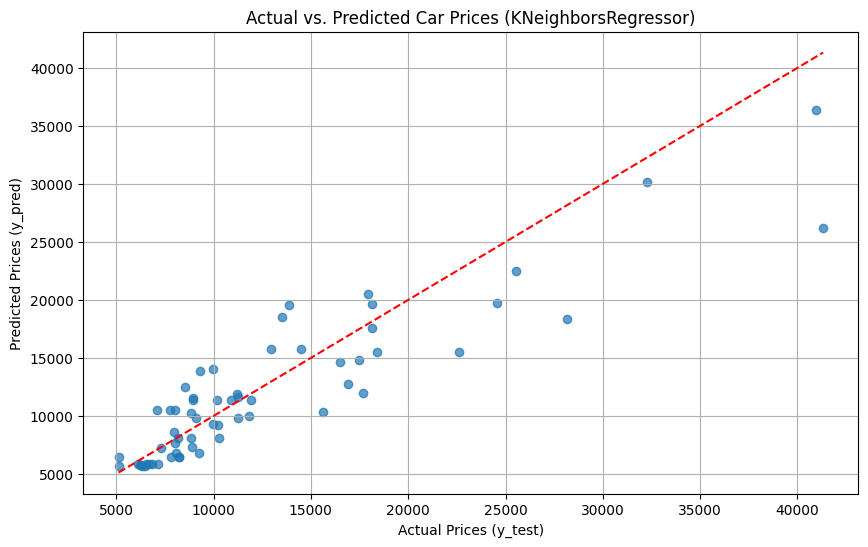

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices (y_test)')
plt.ylabel('Predicted Prices (y_pred)')
plt.title('Actual vs. Predicted Car Prices (KNeighborsRegressor)')
plt.grid(True)
plt.show()